### Questions

- Clustering is limited by dimensions

### Objectives
YWBAT
- measure the correct number of clusters to use
- use various metrics to decide cluster numbers and create a pipeline for new data points

### Outline

In [0]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, 
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [0]:
# make a dataset with 20 features and 3 groups 
X, y = make_blobs(n_features= 20, n_samples= 3000, centers = np.random.randint(3, 10), cluster_std=3.0)


In [0]:
# let's visualize our data
pca = PCA(n_components = 2)
transformed = pca.fit_transform(X)
transformed[:5]

array([[-2.93476341e+00,  2.62671947e+01],
       [-4.25953668e+00,  2.51428884e+00],
       [-2.25210743e-02, -1.30017013e+01],
       [ 1.79461044e+00,  2.53031724e+01],
       [-1.46983576e+00,  2.52421315e+01]])

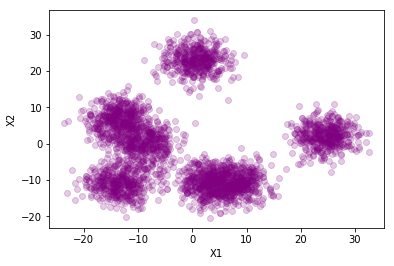

In [0]:
plt.scatter(x = transformed[:,0],y = transformed[:,1], alpha=0.2, c='purple')
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [0]:
color_dict = {0:"green", 1: "yellow", 2: "black", 3: "purple", 4: "orange", 5: "red", 6:"pink"}

### Let's get some clusters

In [0]:
def view_clusters(n_clusters=3, plotting=False):
  kmean = KMeans(n_clusters=n_clusters)
  kmean.fit(X)
  labels = kmean.labels_
  if plotting:
    color_vec = [color_dict[l] for l in labels]
    plt.scatter(x = transformed[:,0],y = transformed[:,1], alpha=0.2, c=color_vec)
    plt.grid()
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()
  return kmean

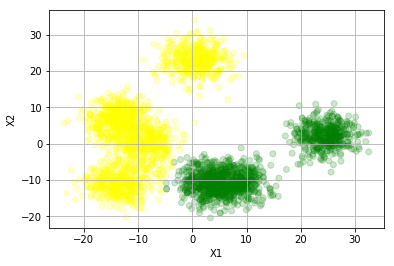

In [0]:
view_clusters(2)

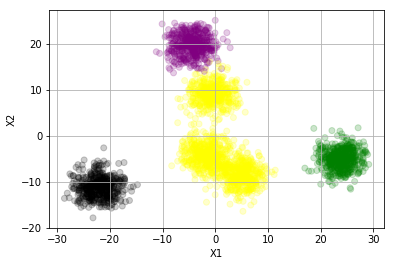

In [0]:
view_clusters(4)

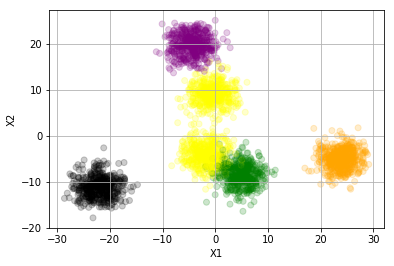

In [0]:
view_clusters(5)

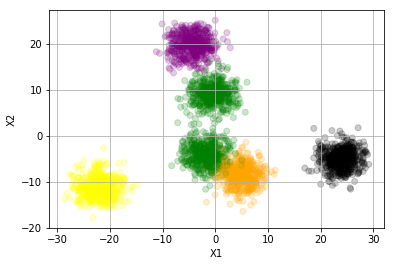

In [0]:
view_clusters(5)

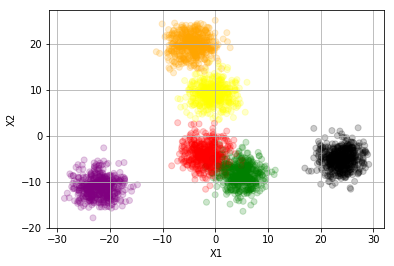

In [0]:
view_clusters(6)

### How do we choose the number of clusters?

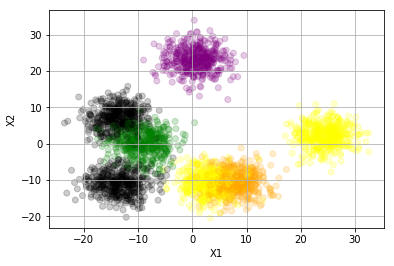

In [0]:
k = view_clusters(5)

In [0]:
inertias = []
for i in range(2, 20):
  k = view_clusters(i)
  inertia = k.inertia_
  inertias.append(inertia)

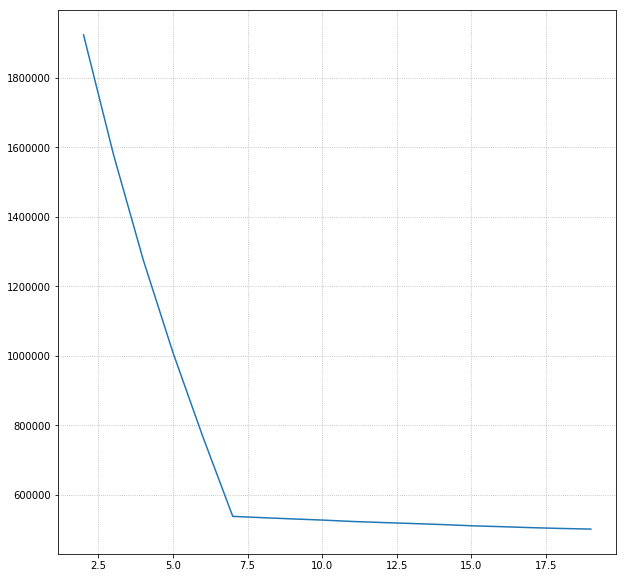

In [0]:
plt.figure(figsize=(10, 10))
plt.grid(linestyle=':')
plt.plot(range(2, 20), inertias)
plt.show()

### Assessment